In [10]:
from zipfile import ZipFile, BadZipFile
import os

zip_file_path = '/content/women-fashion.zip'
extraction_directory = '/content/women_fashion/'

# Check if the zip file exists
if not os.path.exists(zip_file_path):
    print(f"Zip file does not exist: {zip_file_path}")
else:
    try:
        # Attempt to open and extract the zip file
        with ZipFile(zip_file_path, 'r') as zip_ref:
            if not os.path.exists(extraction_directory):
                os.makedirs(extraction_directory)
            zip_ref.extractall(extraction_directory)

        extracted_files = os.listdir(extraction_directory)
        print(extracted_files[:10])
    except BadZipFile:
        print("Error: The file is not a valid zip file or it is corrupted.")

# List the files in the /content/ directory to verify
content_files = os.listdir('/content/')
print("Files in /content/:", content_files)


['women fashion', '__MACOSX']
Files in /content/: ['.config', 'women-fashion.zip', 'women_fashion', '.ipynb_checkpoints', 'sample_data']


In [11]:
# correcting the path to include the 'women fashion' directory and listing its contents
extraction_directory_updated = os.path.join(extraction_directory, 'women fashion')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['beige top adorned with black dots and a green skirt.jpg',
  'one-shoulder, black, sequined dress with fringe detailing at the hem.jpg',
  'long, elegant blue dress with an off-the-shoulder design with sheer sleeves.jpg',
  'light brown sleeveless double-breasted blazer paired with matching straight-leg trousers.jpg',
  'classic black slip dress with a midi length.jpg',
  'strapless, sequined dress that sparkles with multiple colors.jpg',
  'long, flowing dress with a full skirt.jpg',
  'fitted, cream-colored dress with long sheer sleeves.jpg',
  'l-htdrss7133-honky-tonky-original-imagszfhfghhs2rp.jpeg',
  'blue dress with a floral pattern.jpg'],
 97)

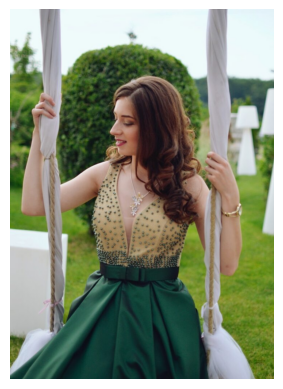

In [12]:
from PIL import Image
import matplotlib.pyplot as plt

# function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# display the first image to understand its characteristics
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
display_image(first_image_path)

In [13]:
import glob

# directory path containing your images
image_directory = '/content/women_fashion/women fashion'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

['/content/women_fashion/women fashion/beige top adorned with black dots and a green skirt.jpg', '/content/women_fashion/women fashion/one-shoulder, black, sequined dress with fringe detailing at the hem.jpg', '/content/women_fashion/women fashion/long, elegant blue dress with an off-the-shoulder design with sheer sleeves.jpg', '/content/women_fashion/women fashion/light brown sleeveless double-breasted blazer paired with matching straight-leg trousers.jpg', '/content/women_fashion/women fashion/classic black slip dress with a midi length.jpg', '/content/women_fashion/women fashion/strapless, sequined dress that sparkles with multiple colors.jpg', '/content/women_fashion/women fashion/long, flowing dress with a full skirt.jpg', '/content/women_fashion/women fashion/fitted, cream-colored dress with long sheer sleeves.jpg', '/content/women_fashion/women fashion/l-htdrss7133-honky-tonky-original-imagszfhfghhs2rp.jpeg', '/content/women_fashion/women fashion/blue dress with a floral pattern

**Feature Extraction using VGG16 model**

In [14]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)

def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))

1/1 [==============================] - 1s 566ms/step


In [18]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/women_fashion/women fashion', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Rcmdn {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 [==============================] - 1s 562ms/step


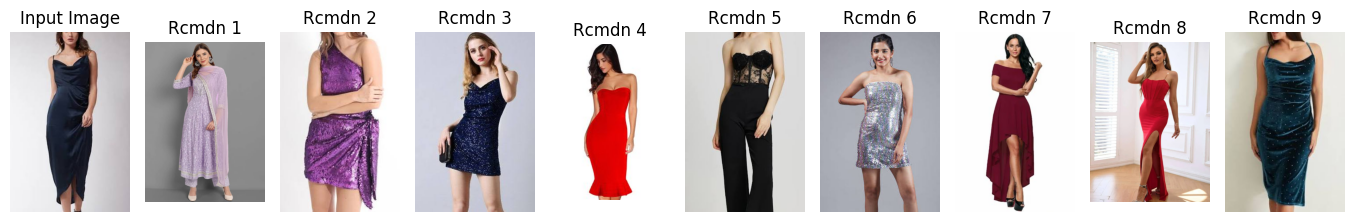

In [19]:
input_image_path = '/content/women_fashion/women fashion/dark, elegant, sleeveless dress that reaches down to about mid-calf.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=10)